In [104]:
#importing libraries 
import pandas as pd
from shapely.geometry import Point #shapely for converting longitude/latitude
import geopandas as gpd #to create geodataframe. 
import matplotlib.pyplot as plt #to create plot
import numpy as np 
import contextily as ctx #to utilize raster at a later point
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [38]:
cane = pd.read_csv("/Users/gschneider/scientific-computing/data.csv")

In [39]:
cane.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,43437,2011-12-16,2011-12-16,NaN,Central Time (US & Canada),1639,tonyg,Tony Gerard,2011-12-17 03:05:07 UTC,2015-12-23 05:53:48 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/43437,https://static.inaturalist.org/photos/70668/me...,NaN,Cache River,NaN,1,0,False,NaN,"Bellrose waterfowl Area, Cypress Creek N.W.R.,...",37.290170,-89.131222,NaN,NaN,NaN,NaN,28403.0,NaN,open,False,NaN,NaN,NaN,Pulaski,Illinois,United States,Illinois,Pulaski,Arundinaria gigantea,Arundinaria gigantea,river cane,Plantae,121747
1,134389,2012-10-07,2012-10-07,NaN,Eastern Time (US & Canada),129,field_daze,Liv MW,2012-10-12 04:42:43 UTC,2015-05-20 02:09:35 UTC,research,CC-BY-NC-SA,http://www.inaturalist.org/observations/134389,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,NaN,shawnee national forest,37.369345,-88.942681,7075.0,NaN,NaN,NaN,7075.0,NaN,open,False,NaN,manual,NaN,Johnson,Illinois,United States,Illinois,Johnson,River Cane,Arundinaria gigantea,river cane,Plantae,121747
2,217754,"March 17, 2013 11:42:21 AM EDT",2013-03-17,2013-03-17 15:42:21 UTC,Eastern Time (US & Canada),12796,scadwell,Suzanne Cadwell,2013-03-17 19:53:01 UTC,2019-01-22 11:39:38 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/217754,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,2.0,White Pines Nature Preserve,35.616983,-79.150981,10.0,NaN,NaN,NaN,10.0,NaN,NaN,False,gps,gps,NaN,Chatham,North Carolina,United States,North Carolina,Chatham,river cane,Arundinaria gigantea,river cane,Plantae,121747
3,219977,2013-03-19,2013-03-19,NaN,Eastern Time (US & Canada),3733,james5,James Shelton,2013-03-20 21:54:56 UTC,2016-10-24 23:29:38 UTC,research,CC-BY-NC-SA,http://www.inaturalist.org/observations/219977,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,NaN,"Back Bay Wildlife Refuge, VA, US",36.661267,-75.934711,7078.0,NaN,NaN,NaN,7078.0,NaN,NaN,False,NaN,NaN,NaN,NaN,Virginia,United States,Virginia,Virginia Beach City,River Cane,Arundinaria gigantea,river cane,Plantae,121747
4,223924,Thu Mar 21 2013 16:00:58 GMT-0500 (CDT),2013-03-21,2013-03-21 21:00:58 UTC,Central Time (US & Canada),14292,charlabeck,NaN,2013-03-27 19:00:05 UTC,2017-02-20 07:08:13 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/223924,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,2,0,False,NaN,"Cache River, Belknap, Illinois, US",37.357500,-88.915500,NaN,NaN,NaN,NaN,28403.0,NaN,open,False,NaN,NaN,NaN,Johnson,Illinois,United States,Illinois,Johnson,River Cane,Arundinaria gigantea,river cane,Plantae,121747


In [40]:
pd.set_option('display.max_columns', None)

In [41]:
cane.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,43437,2011-12-16,2011-12-16,NaN,Central Time (US & Canada),1639,tonyg,Tony Gerard,2011-12-17 03:05:07 UTC,2015-12-23 05:53:48 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/43437,https://static.inaturalist.org/photos/70668/me...,NaN,Cache River,NaN,1,0,False,NaN,"Bellrose waterfowl Area, Cypress Creek N.W.R.,...",37.290170,-89.131222,NaN,NaN,NaN,NaN,28403.0,NaN,open,False,NaN,NaN,NaN,Pulaski,Illinois,United States,Illinois,Pulaski,Arundinaria gigantea,Arundinaria gigantea,river cane,Plantae,121747
1,134389,2012-10-07,2012-10-07,NaN,Eastern Time (US & Canada),129,field_daze,Liv MW,2012-10-12 04:42:43 UTC,2015-05-20 02:09:35 UTC,research,CC-BY-NC-SA,http://www.inaturalist.org/observations/134389,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,NaN,shawnee national forest,37.369345,-88.942681,7075.0,NaN,NaN,NaN,7075.0,NaN,open,False,NaN,manual,NaN,Johnson,Illinois,United States,Illinois,Johnson,River Cane,Arundinaria gigantea,river cane,Plantae,121747
2,217754,"March 17, 2013 11:42:21 AM EDT",2013-03-17,2013-03-17 15:42:21 UTC,Eastern Time (US & Canada),12796,scadwell,Suzanne Cadwell,2013-03-17 19:53:01 UTC,2019-01-22 11:39:38 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/217754,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,2.0,White Pines Nature Preserve,35.616983,-79.150981,10.0,NaN,NaN,NaN,10.0,NaN,NaN,False,gps,gps,NaN,Chatham,North Carolina,United States,North Carolina,Chatham,river cane,Arundinaria gigantea,river cane,Plantae,121747
3,219977,2013-03-19,2013-03-19,NaN,Eastern Time (US & Canada),3733,james5,James Shelton,2013-03-20 21:54:56 UTC,2016-10-24 23:29:38 UTC,research,CC-BY-NC-SA,http://www.inaturalist.org/observations/219977,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,1,0,False,NaN,"Back Bay Wildlife Refuge, VA, US",36.661267,-75.934711,7078.0,NaN,NaN,NaN,7078.0,NaN,NaN,False,NaN,NaN,NaN,NaN,Virginia,United States,Virginia,Virginia Beach City,River Cane,Arundinaria gigantea,river cane,Plantae,121747
4,223924,Thu Mar 21 2013 16:00:58 GMT-0500 (CDT),2013-03-21,2013-03-21 21:00:58 UTC,Central Time (US & Canada),14292,charlabeck,NaN,2013-03-27 19:00:05 UTC,2017-02-20 07:08:13 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/223924,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,2,0,False,NaN,"Cache River, Belknap, Illinois, US",37.357500,-88.915500,NaN,NaN,NaN,NaN,28403.0,NaN,open,False,NaN,NaN,NaN,Johnson,Illinois,United States,Illinois,Johnson,River Cane,Arundinaria gigantea,river cane,Plantae,121747


In [66]:
#creating a geometry column 
geometry = [Point(xy) for xy in zip(cane['longitude'], cane['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(cane, crs=crs, geometry=geometry)

/Users/gschneider/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [67]:
#removing unnecessary columns 
cane = cane[['scientific_name','place_state_name','place_country_name','latitude','longitude', 'geometry']]

In [68]:
cane.head()

,scientific_name,place_state_name,place_country_name,latitude,longitude,geometry
0,Arundinaria gigantea,Illinois,United States,37.290170,-89.131222,POINT (-89.13122 37.29017)
1,Arundinaria gigantea,Illinois,United States,37.369345,-88.942681,POINT (-88.94268 37.36935)
2,Arundinaria gigantea,North Carolina,United States,35.616983,-79.150981,POINT (-79.15098 35.61698)
3,Arundinaria gigantea,Virginia,United States,36.661267,-75.934711,POINT (-75.93471 36.66127)
4,Arundinaria gigantea,Illinois,United States,37.357500,-88.915500,POINT (-88.91550 37.35750)


In [69]:
fcane = cane[['scientific_name','place_state_name','place_country_name','latitude','longitude', 'geometry']]

In [70]:
fcane

,scientific_name,place_state_name,place_country_name,latitude,longitude,geometry
0,Arundinaria gigantea,Illinois,United States,37.290170,-89.131222,POINT (-89.13122 37.29017)
1,Arundinaria gigantea,Illinois,United States,37.369345,-88.942681,POINT (-88.94268 37.36935)
2,Arundinaria gigantea,North Carolina,United States,35.616983,-79.150981,POINT (-79.15098 35.61698)
3,Arundinaria gigantea,Virginia,United States,36.661267,-75.934711,POINT (-75.93471 36.66127)
4,Arundinaria gigantea,Illinois,United States,37.357500,-88.915500,POINT (-88.91550 37.35750)
...,...,...,...,...,...,...
3007,Arundinaria gigantea,Missouri,United States,38.622923,-90.822037,POINT (-90.82204 38.62292)
3008,Arundinaria gigantea,Georgia,United States,34.671413,-84.497367,POINT (-84.49737 34.67141)
3009,Arundinaria gigantea,Tennessee,United States,36.448694,-85.062098,POINT (-85.06210 36.44869)
3010,Arundinaria gigantea,Oklahoma,United States,35.447900,-94.974113,POINT (-94.97411 35.44790)


In [71]:
#saving as separate file
fcane.to_csv('cane_data_filtered')

In [72]:
gdf.head()

,scientific_name,place_state_name,place_country_name,latitude,longitude,geometry
0,Arundinaria gigantea,Illinois,United States,37.290170,-89.131222,POINT (-89.13122 37.29017)
1,Arundinaria gigantea,Illinois,United States,37.369345,-88.942681,POINT (-88.94268 37.36935)
2,Arundinaria gigantea,North Carolina,United States,35.616983,-79.150981,POINT (-79.15098 35.61698)
3,Arundinaria gigantea,Virginia,United States,36.661267,-75.934711,POINT (-75.93471 36.66127)
4,Arundinaria gigantea,Illinois,United States,37.357500,-88.915500,POINT (-88.91550 37.35750)


<Axes: >

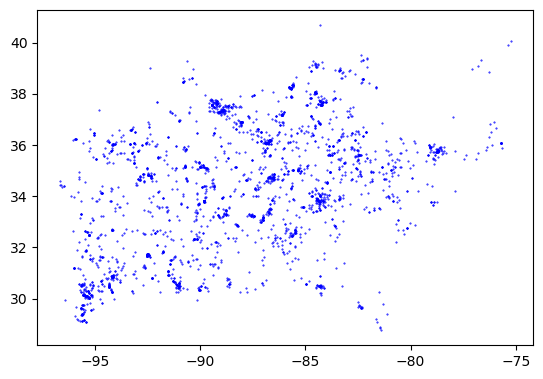

In [73]:
#plot all points 
gdf.plot(marker='o', color='b', markersize=0.2)

In [87]:
#filter for Georgia
georgia_cane = fcane[fcane['place_state_name'] == 'Georgia']

In [176]:
georgia_cane

,scientific_name,place_state_name,place_country_name,latitude,longitude,geometry
17,Arundinaria gigantea,Georgia,United States,33.379115,-84.619861,POINT (-84.61986 33.37911)
33,Arundinaria gigantea,Georgia,United States,33.383221,-84.614382,POINT (-84.61438 33.38322)
46,Arundinaria gigantea,Georgia,United States,34.906035,-85.241715,POINT (-85.24171 34.90603)
130,Arundinaria gigantea,Georgia,United States,33.912426,-83.228458,POINT (-83.22846 33.91243)
143,Arundinaria gigantea,Georgia,United States,34.241081,-84.516598,POINT (-84.51660 34.24108)
...,...,...,...,...,...,...
2956,Arundinaria gigantea,Georgia,United States,33.577033,-85.110467,POINT (-85.11047 33.57703)
2957,Arundinaria gigantea,Georgia,United States,33.593890,-85.048014,POINT (-85.04801 33.59389)
2983,Arundinaria gigantea,Georgia,United States,33.031176,-83.209092,POINT (-83.20909 33.03118)
2998,Arundinaria gigantea,Georgia,United States,33.804809,-84.158275,POINT (-84.15827 33.80481)


In [105]:
#create georgia-specific specific plot points
georgia_gdf = gdf[gdf['place_state_name'] == 'Georgia']

<Axes: >

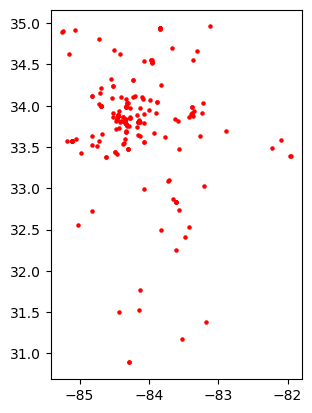

In [184]:
#testing...testing...
georgia_gdf.plot(marker='o', color='red', markersize=5)

In [182]:
#read georgia shapefile
georgia_shapefile = gpd.read_file('/Users/gschneider/scientific-computing/Georgia_State_Boundary/Georgia_State_Boundary.shp')

Text(89.34872512318084, 0.5, 'Latitude')

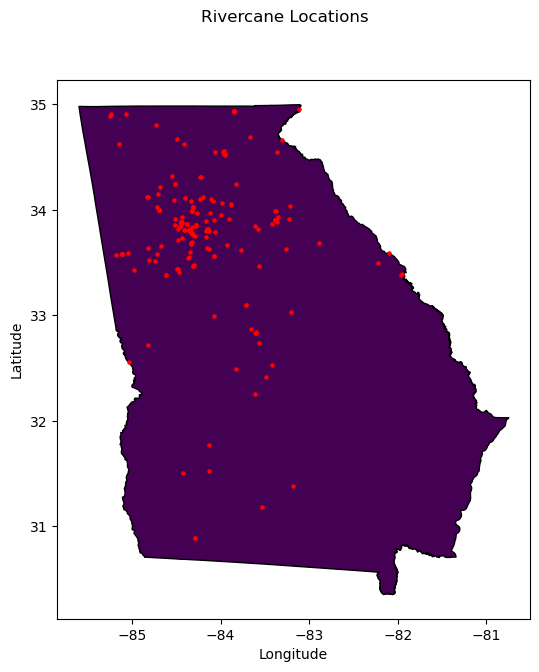

In [181]:
#plot initial map
fig, ax = plt.subplots(figsize=(7,7))

georgia_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="viridis")

georgia_gdf.plot(ax=ax, color='red', markersize=5);



fig.suptitle('Rivercane Locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')